## Problem Statement

#### In Pakistan, the property sector plays a huge role in the economic development. After agriculture, it s one of the hot and in demand sector of investment for Pakistani people. Property prices in Pakistan are drived by some major factors which include Property location, type, size and facilities near the property location and most important the status of the location.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
data_path=''
zameen_df=pd.read_excel(data_path)
zameen_df ## loading dataset

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,10 Marla Double Storey House Available For At...,https://www.zameen.com/Property/nowshera_armou...,Nowshera,House,10 Marla,PKR\n40 Thousand,For,"Armour Colony, Nowshera, Khyber Pakhtunkhwa",Malik Real Estate and Builders Take your pick ...,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18251,2 Marla Double Storey House For In Okara Shah...,https://www.zameen.com/Property/okara_shah_din...,Okara,House,2 Marla,PKR\n14 Thousand,For,"Shah Din Road, Okara, Punjab",NaN,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18252,8 Marla Single Story House Is Available For I...,https://www.zameen.com/Property/okara_umer_din...,Okara,House,8 Marla,PKR\n40 Thousand,For,"Umer Din Town, Okara, Punjab",8 Marla Single Story House Is Available For I...,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18253,Beautiful House For In Attock Cantt,https://www.zameen.com/Property/attock_cantt_b...,Attock,House,1 Kanal,PKR\n1 Lakh,For,"Cantt, Attock, Punjab",NaN,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic

In [3]:
zameen_df.info() ## basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

#### Drop Duplicates

In [4]:
zameen_df.drop_duplicates(inplace=True) ## dropping duplicates

#### Removing extra Items

In [5]:
zameen_df['Price']=zameen_df['Price'].str.replace('PKR','').str.replace(',','').str.replace('\n','') ## Removing PKR, ','  and '\n' from Price column
zameen_df['Area']=zameen_df['Area'].str.replace(',','') ## Removing PKR, ','  and '\n' from Price column

In [6]:
zameen_df['Area']

0        128 Sq. Yd.
1        161 Sq. Yd.
2        111 Sq. Yd.
3        106 Sq. Yd.
4        156 Sq. Yd.
            ...     
18250       10 Marla
18251        2 Marla
18252        8 Marla
18253        1 Kanal
18254       10 Marla
Name: Area, Length: 18255, dtype: object

#### Converting Marla, Sq.YD and Kanal to Sq Ft 

In [7]:
def convert(area_str):
    area_value=0
    if isinstance(area_str,str):
        if 'Marla'in  area_str or 'marla' in area_str:
            area_value=float(area_str.split(' ')[0])*225
        elif 'Kanal' in area_str or 'kanal' in area_str:
            area_value=float(area_str.split(' ')[0])*5445
        elif 'Sq. Yd.' in area_str or 'Sq. Yd' in area_str:
            area_value=float(area_str.split(' ')[0])*9
        else:
            None
    else:
        return area_str
    return area_value

In [8]:
zameen_df['Area']=zameen_df['Area'].apply(convert)

In [9]:
zameen_df['Area']

0        1152.0
1        1449.0
2         999.0
3         954.0
4        1404.0
          ...  
18250    2250.0
18251     450.0
18252    1800.0
18253    5445.0
18254    2250.0
Name: Area, Length: 18255, dtype: float64

#### Price Conversion 

In [10]:
def convert_price(price_str):
    price_value = 0
    if isinstance(price_str, str):
        # Remove commas
        price_str = price_str.replace(',', '')
        
        if 'Crore' in price_str or 'crore' in price_str:
            price_value = float(price_str.split(' ')[0]) * 10000000
        
        elif 'Lakh' in price_str or 'lakh' in price_str:
            price_value = float(price_str.split(' ')[0]) * 100000
        
        elif 'Thousand' in price_str or 'thousand' in price_str:
            price_value = float(price_str.split(' ')[0]) * 1000
    else:
        return price_str
    
    return price_value


In [11]:
zameen_df['Price']=zameen_df['Price'].apply(convert_price)

### Missing Values

In [12]:
zameen_df.isna().sum() ## checking missing values

Title                                 16
URL                                    0
City                                   0
Type                                  16
Area                                  16
Price                                 16
Purpose                               16
Location                              16
Description                         3362
Built in year                       6315
Parking Spaces                      8599
Double Glazed Windows              18255
Central Air Conditioning           18255
Central Heating                    18255
Flooring                           18255
Electricity Backup                 18255
Waste Disposal                     18255
Floors                              9889
Other Main Features                18255
Furnished                          18255
Bedrooms                              16
Bathrooms                             16
Servant Quarters                    8598
Drawing Room                       18255
Dining Room     

In [13]:
percentage_missing= (zameen_df.isna().sum()/zameen_df.shape[0])*100
percentage_missing ## percentage of missing values

Title                                0.087647
URL                                  0.000000
City                                 0.000000
Type                                 0.087647
Area                                 0.087647
Price                                0.087647
Purpose                              0.087647
Location                             0.087647
Description                         18.416872
Built in year                       34.593262
Parking Spaces                      47.104903
Double Glazed Windows              100.000000
Central Air Conditioning           100.000000
Central Heating                    100.000000
Flooring                           100.000000
Electricity Backup                 100.000000
Waste Disposal                     100.000000
Floors                              54.171460
Other Main Features                100.000000
Furnished                          100.000000
Bedrooms                             0.087647
Bathrooms                         

In [14]:
### Dropping columns with 50% or more than 50% missing values
columns_to_drop= zameen_df.loc[:, percentage_missing>=50]

In [15]:
zameen_df=zameen_df.drop(columns_to_drop.columns,axis=1)
zameen_df

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,1152.0,47500000.0,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,NaN,2,2,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,1449.0,62500000.0,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,NaN,2,3,NaN,1.0,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,999.0,34500000.0,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,NaN,1,2,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,954.0,29800000.0,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,1.0,1,2,1.0,4.0,1.0
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,1404.0,46500000.0,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,NaN,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,10 Marla Double Storey House Available For At...,https://www.zameen.com/Property/nowshera_armou...,Nowshera,House,2250.0,40000.0,For,"Armour Colony, Nowshera, Khyber Pakhtunkhwa",Malik Real Estate and Builders Take your pick ...,2024.0,1.0,5,5,1.0,2.0,1.0
18251,2 Marla Double Storey House For In Okara Shah...,https://www.zameen.com/Property/okara_shah_din...,Okara,House,450.0,14000.0,For,"Shah Din Road, Okara, Punjab",NaN,2022.0,NaN,2,2,NaN,1.0,1.0
18252,8 Marla Single Story House Is Available For I...,https://www.zameen.com/Property/okara_umer_din...,Okara,House,1800.0,40000.0,For,"Umer Din Town, Okara, Punjab",8 Marla Single Story House Is Available For I...,2024.0,3.0,3,3,1.0,2.0,NaN
18253,Beautiful House For In Attock Cantt,https://www.zameen.com/Property/attock_cantt_b...,Attock,House,5445.0,100000.0,For,"Cantt, Attock, Punjab",NaN,2021.0,1.0,6,5,NaN,1.0,NaN


### Data Imputaion

In [16]:
zameen_df.isna().sum() ## checking missing values after dropping columns

Title                 16
URL                    0
City                   0
Type                  16
Area                  16
Price                 16
Purpose               16
Location              16
Description         3362
Built in year       6315
Parking Spaces      8599
Bedrooms              16
Bathrooms             16
Servant Quarters    8598
Kitchens            4999
Store Rooms         8536
dtype: int64

In [17]:
categorical_columns=zameen_df.select_dtypes(include='object').columns ## Checking categorical and numeric columns
numeric_columns=zameen_df.select_dtypes(include='float64').columns

print('Categorical Columns: ',categorical_columns)
print('Numeric_Columns: ',numeric_columns)

Categorical Columns:  Index(['Title', 'URL', 'City', 'Type', 'Purpose', 'Location', 'Description',
       'Bedrooms', 'Bathrooms'],
      dtype='object')
Numeric_Columns:  Index(['Area', 'Price', 'Built in year', 'Parking Spaces', 'Servant Quarters',
       'Kitchens', 'Store Rooms'],
      dtype='object')


In [18]:
## converting Bedrooms and Bathrooms to numeric values
zameen_df['Bedrooms']= pd.to_numeric(zameen_df['Bedrooms'],errors='coerce') 
zameen_df['Bathrooms']= pd.to_numeric(zameen_df['Bathrooms'],errors='coerce')

In [19]:
categorical_columns=zameen_df.select_dtypes(include='object').columns ## Checking categorical and numeric columns
numeric_columns=zameen_df.select_dtypes(include='float64').columns
print('Categorical Columns: ',categorical_columns)
print('Numeric_Columns: ',numeric_columns)

Categorical Columns:  Index(['Title', 'URL', 'City', 'Type', 'Purpose', 'Location', 'Description'], dtype='object')
Numeric_Columns:  Index(['Area', 'Price', 'Built in year', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms'],
      dtype='object')


#### Filling nans for Categorical Columns

##### All the columns instead of Description will be filled with mode value and for Description it will No Description Available as it has large text data and is also unique.

In [20]:
cat_cols_with_na=[col for col in categorical_columns if zameen_df[col].isna().sum()>0]
### Filling missing values in categorical columns with mode instead for Description column as it has large text data
for col in cat_cols_with_na:
    if col !='Description':
        zameen_df[col]=zameen_df[col].fillna(zameen_df[col].mode()[0])

In [21]:
zameen_df['Description']=zameen_df['Description'].fillna('No Description Available') ## Filling missing values in Description column with 'No Description Available'

#### Filling Nans for Numeric Columns

##### Filling all the columns with median as Area and Price are highly skewed so we fill it median as it is more robust. Moreover, all other columns are also filled with median. Only Built in year has been filled with median based groupby based on city. 

In [22]:
num_cols_with_na=[col for col in numeric_columns if zameen_df[col].isna().sum()>0]
num_cols_with_na

for cols in num_cols_with_na[:len(num_cols_with_na)-1]:
    zameen_df[cols]=zameen_df[cols].fillna(zameen_df[cols].median())

In [23]:
zameen_df['Built in year']=zameen_df['Built in year'].fillna(zameen_df.groupby('City')['Built in year'].median()) ## Filling missing values in 'Built in year' column with median of respective city

### Data Cleaning & Consistency

In [24]:
zameen_df['City'].unique() ### City contains incocsistent values like 'Karachi' and 'Karachi '

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
       'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
       'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
       'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
       'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
       'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
       'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
       'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian', 'Karachi ',
       'Islamabad ', 'Faisalabad ', 'Multan ', 'Rawalpindi ',
       'Gujranwala ', 'Peshawar ', 'Lahore ', 'Jhelum ', 'Hyderabad ',
       'Sialkot  ', 'Murree ', 'Bahawalpur ', 'Abbottabad ', 'Wah ',
       'Gujrat ', 'Sahiwal ', 'Sheikhupura

In [25]:
zameen_df['City']=zameen_df['City'].str.strip().str.title() ## Removing leading and trailing spaces and converting to title case

In [26]:
zameen_df['Type'].unique()

array(['Flat', 'House', 'Upper Portion', 'Lower Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

#### Removing Outliers using IQR and Z-Score
##### If the column is skewed we will use IQR esle Z-score to remove outliers. No outlier removal for 'Built in year', 'Parking Spaces', 'Servant Quarters',  'Kitchens','Store Rooms' as they are discrete

In [27]:
skewness_values=zameen_df[numeric_columns].skew()
skewness_values

Area                135.104401
Price                 6.335128
Built in year       112.729422
Parking Spaces       32.761743
Bedrooms              0.675447
Bathrooms            -0.490940
Servant Quarters     11.934638
Kitchens             98.189345
Store Rooms           8.726515
dtype: float64

In [28]:
skewed_cols = ['Price', 'Area']

df_clean = zameen_df.copy()

for col in skewed_cols:
    # Log transform (temporary)
    log_col = np.log1p(df_clean[col])

    Q1 = log_col.quantile(0.25)
    Q3 = log_col.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Apply filter
    df_clean = df_clean[(log_col >= lower) & (log_col <= upper)]

# overwrite only once (optional)
zameen_df = df_clean
zameen_df.reset_index(drop=True, inplace=True)

In [30]:
z_scores = np.abs(zameen_df[['Bedrooms', 'Bathrooms']].apply(zscore))
# Keep rows where ALL z-scores are within threshold
zameen_df = zameen_df[(z_scores <= 3).all(axis=1)]
zameen_df.reset_index(drop=True, inplace=True)


In [31]:
zameen_df.describe()

,Area,Price,Built in year,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
count,17748.000000,1.774800e+04,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,9465.000000
mean,2483.932556,2.761448e+07,1985.583418,3.595881,4.075501,4.421850,1.117591,1.766622,1.158901
std,2023.343620,5.454505e+07,1593.233015,30.268469,1.539818,1.538496,0.517218,1.738324,0.482471
min,292.500000,6.000000e+03,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1125.000000,1.400000e+05,2023.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,1800.000000,1.500000e+07,2024.000000,2.000000,4.000000,5.000000,1.000000,2.000000,1.000000
75%,2700.000000,3.400000e+07,2024.000000,2.000000,5.000000,6.000000,1.000000,2.000000,1.000000
max,11434.500000,9.900000e+08,202122.000000,2015.000000,9.000000,8.000000,22.000000,211.000000,18.000000


### Feature Engineering
#### We will derive some new features so that our model can understand the data more effectively

In [32]:
zameen_df['Price per Sq.Ft']=zameen_df['Price']/zameen_df['Area']
zameen_df['Area per Bedroom']=zameen_df['Area']/zameen_df['Bedrooms']
zameen_df['Bathroom to Bedroom Ratio']=zameen_df['Bathrooms']/zameen_df['Bedrooms']
zameen_df['Number of Years Since Built']=2025 - zameen_df['Built in year']

### Univariate Analysis

#### Histogram of Numeric Columns

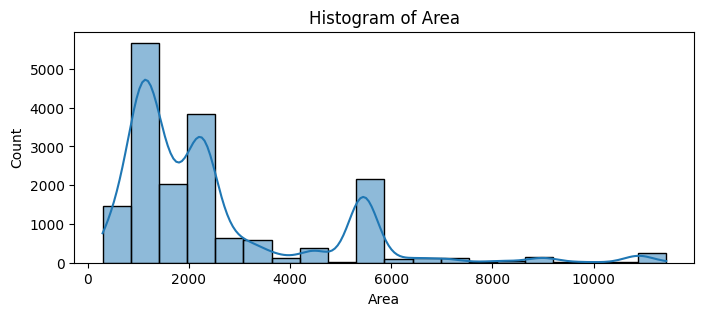

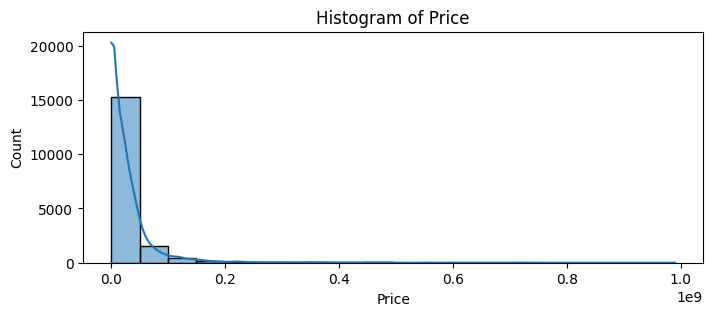

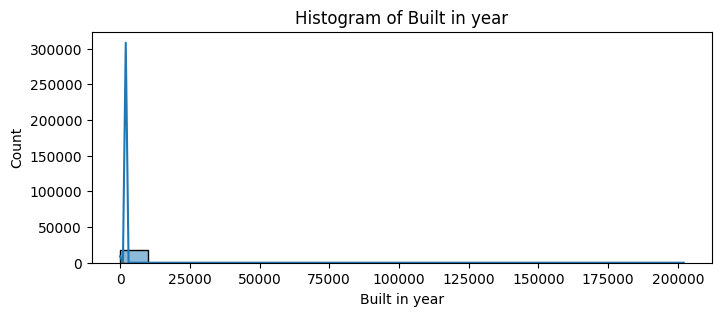

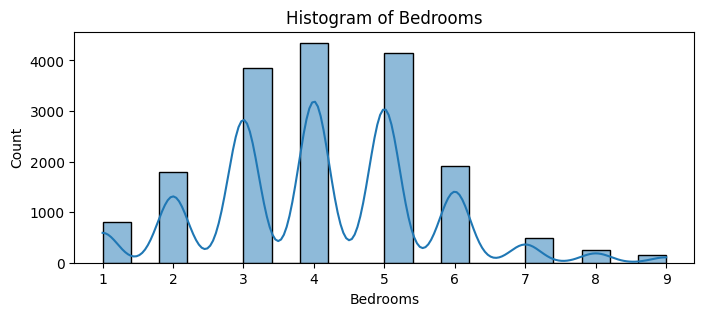

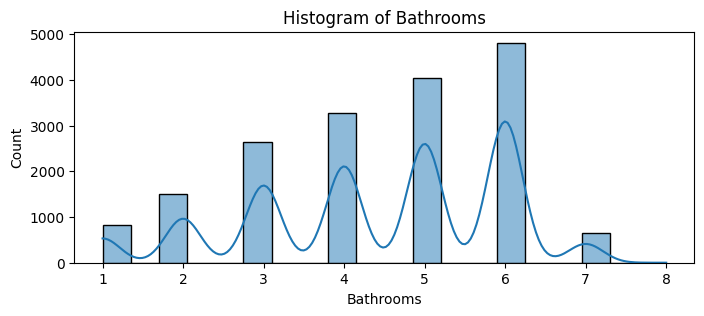

In [ ]:
visuals_path=''
for col in ['Area','Price','Built in year','Bedrooms','Bathrooms']:
    plt.figure(figsize=(8,3))
    sns.histplot(zameen_df[col], bins=20,kde=True)
    plt.title(f'Histogram of {col}')
    plt.savefig(os.path.join(visuals_path, f'{col}_histogram.png'), bbox_inches='tight')
    plt.show()
    

#### Boxplot of Numeric Columns

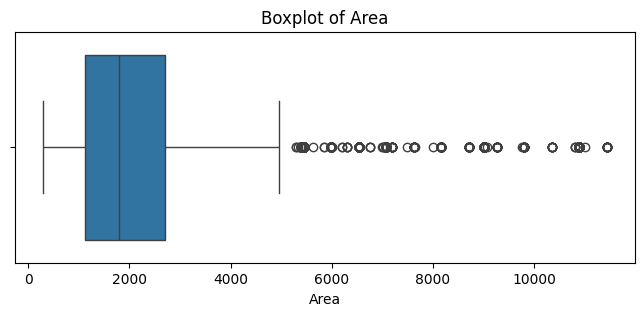

Area summary:
count    17748.000000
mean      2483.932556
std       2023.343620
min        292.500000
25%       1125.000000
50%       1800.000000
75%       2700.000000
max      11434.500000
Name: Area, dtype: float64




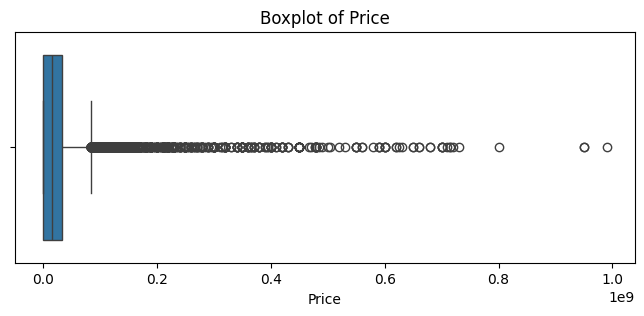

Price summary:
count    1.774800e+04
mean     2.761448e+07
std      5.454505e+07
min      6.000000e+03
25%      1.400000e+05
50%      1.500000e+07
75%      3.400000e+07
max      9.900000e+08
Name: Price, dtype: float64




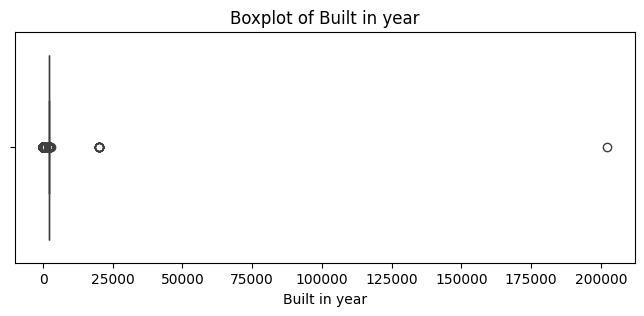

Built in year summary:
count     17748.000000
mean       1985.583418
std        1593.233015
min           0.000000
25%        2023.000000
50%        2024.000000
75%        2024.000000
max      202122.000000
Name: Built in year, dtype: float64




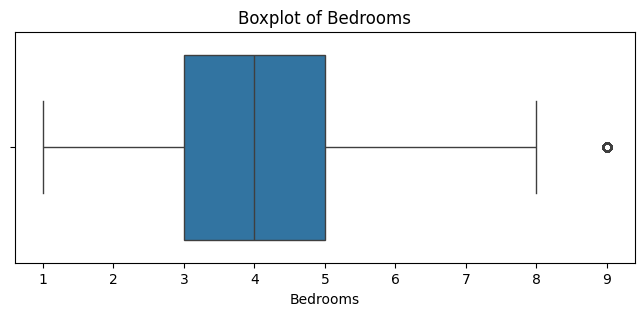

Bedrooms summary:
count    17748.000000
mean         4.075501
std          1.539818
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: Bedrooms, dtype: float64




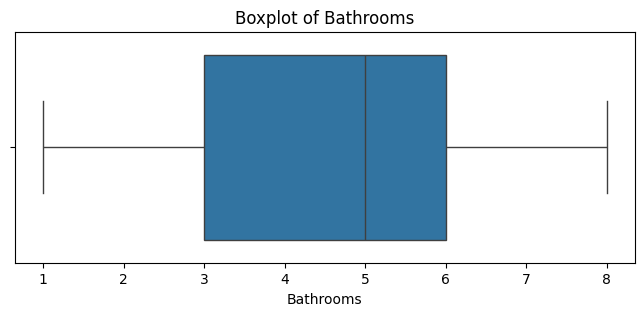

Bathrooms summary:
count    17748.000000
mean         4.421850
std          1.538496
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: Bathrooms, dtype: float64




In [34]:
for col in ['Area','Price','Built in year','Bedrooms','Bathrooms']:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=zameen_df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(os.path.join(visuals_path, f'{col}_boxplot.png'), bbox_inches='tight')
    plt.show()
    
    print(f"{col} summary:")
    print(zameen_df[col].describe())
    print("\n")

### Bivariate Analysis

#### Correlation Heatmap

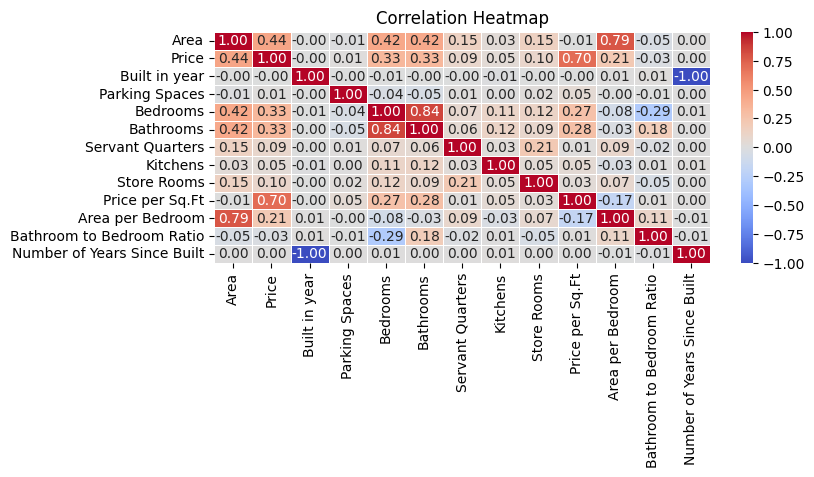

In [37]:
numeric_cols = zameen_df.select_dtypes(include=['int64', 'float64'])
corr_matrix= numeric_cols.corr()

plt.figure(figsize=(8,3))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
